In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("BlackFriday.csv")
del df['Product_Category_2']
del df['Product_Category_3']

In [3]:
for col in df.columns:
    print(col, df[col].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Purchase 17959


# Analyzing Genders
In this section we are going to specifically analyze the Gender Column. So in the gender column we basically have Male and Female values. After doing some basic analysis we have noticed that the Male data is much more than the Female data in our dataset. We have even used the groupby function to see which Gender is purchasing more in our dataset. With the help of pie chart and bar plot we have presented them in a very nice manner.

In [4]:
df[df['Gender'] == 'M'].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686


In [5]:
df[df['Gender'] == 'F'].head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378


In [7]:
data = pd.DataFrame({'Ratio' : [len(df[df['Gender'] == 'M']), len(df[df['Gender'] == 'F'])]}, 
                    index = ['Male', 'Female'])

In [8]:
data.head()

,Ratio
Male,405380
Female,132197


<Axes: ylabel='Ratio'>

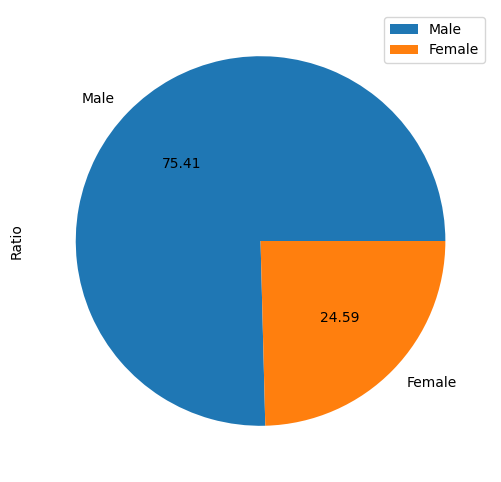

In [9]:
data.plot.pie(y = 'Ratio', figsize = (6,6), autopct = '%.2f')

<Axes: xlabel='Gender'>

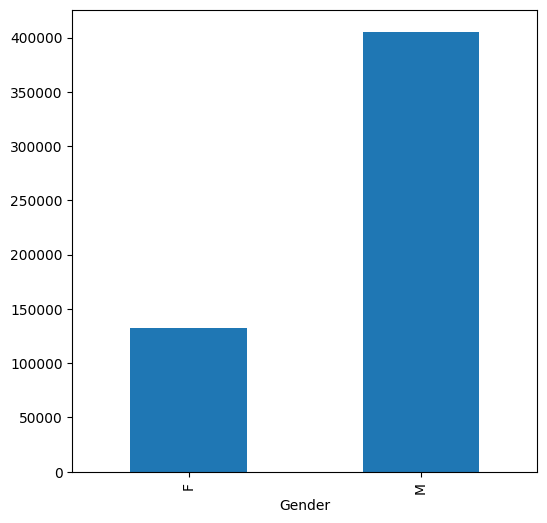

In [10]:
df.groupby('Gender').size().plot(kind = 'bar', figsize = (6,6))

In [11]:
df_new = df.groupby('Gender').sum()['Purchase']

<Axes: ylabel='Purchase'>

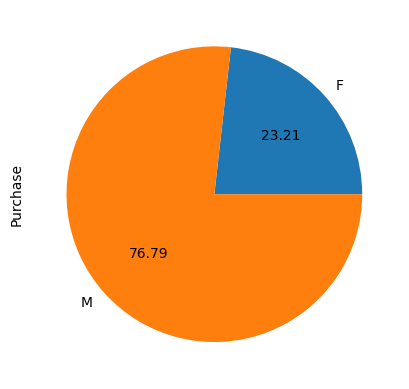

In [12]:
df_new.plot(kind = 'pie', autopct = '%.2f')

<Axes: ylabel='Purchase'>

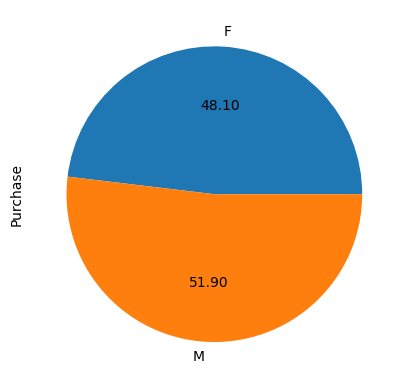

In [13]:
df.groupby('Gender').mean(numeric_only=True)['Purchase'].plot(kind = 'pie', autopct = '%.2f')

# Analysing Age & Marital Status
In this section we are going to analyze the age and Martial Status columns. So we can again use the groupby function to see which age group is making the maximum number of order in our dataset. We can also see which age group has the highest purchasing amount in our dataset and can plot all the inferences with the help of pie chart and bar plots. After doing some basic analysis on Marital Status we can see that 60% of the people in our dataset is unmarried and 40% of them are married. We have even displayed them in pie chart forms for better understanding.

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

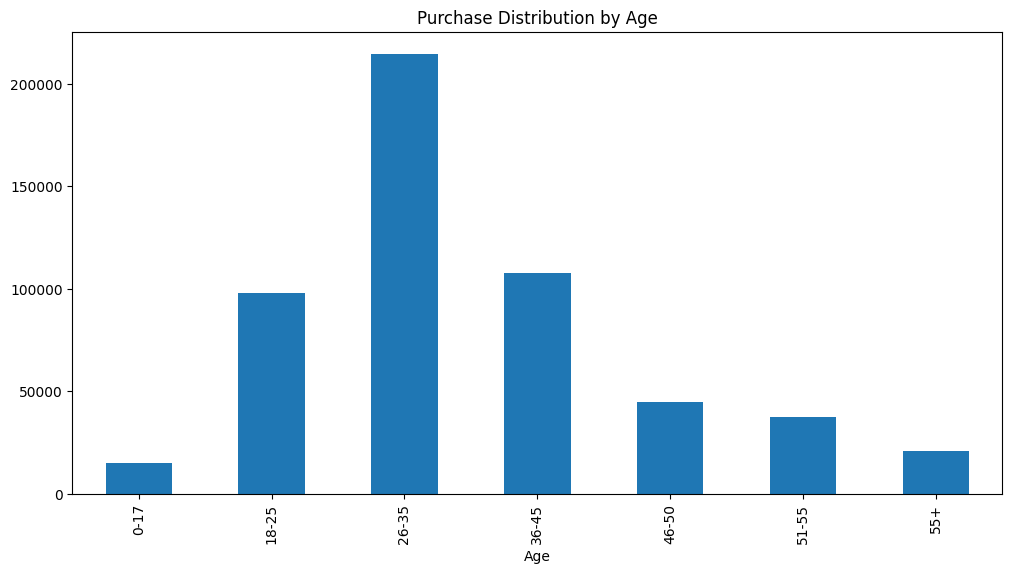

In [14]:
df.groupby('Age').size().plot(kind='bar', figsize = (12,6), title = 'Purchase Distribution by Age')

Number of unique products purchased by each age group

In [15]:
lst = []
for i in df['Age'].unique():
    lst.append([i, df[df['Age']==i]['Product_ID'].nunique()])

data = pd.DataFrame(lst, columns = ['Age', 'Unique Products Purchased'])
data

,Age,Unique Products Purchased
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

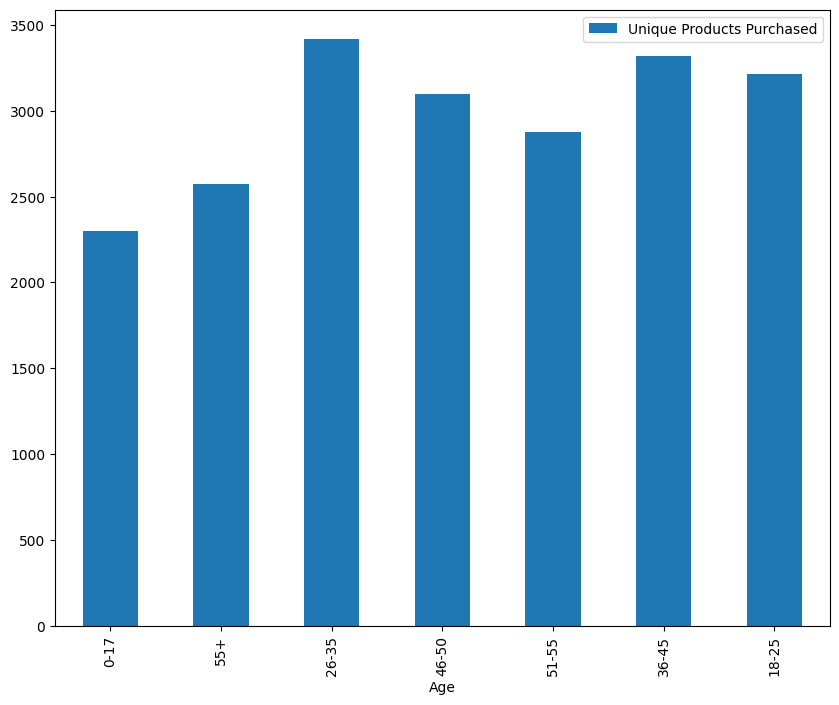

In [16]:
data.plot.bar(x = 'Age', figsize = (10, 8))

Amount spend by each age group

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

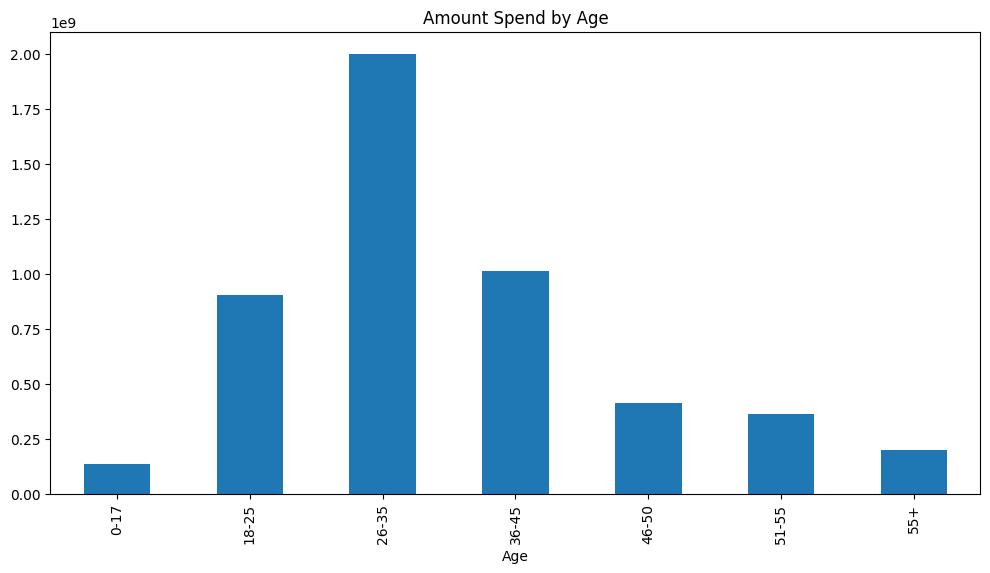

In [17]:
df.groupby('Age').sum()['Purchase'].plot.bar(figsize = (12,6), title = 'Amount Spend by Age')

<Axes: title={'center': 'Avg Amount Spend by Age'}, xlabel='Age'>

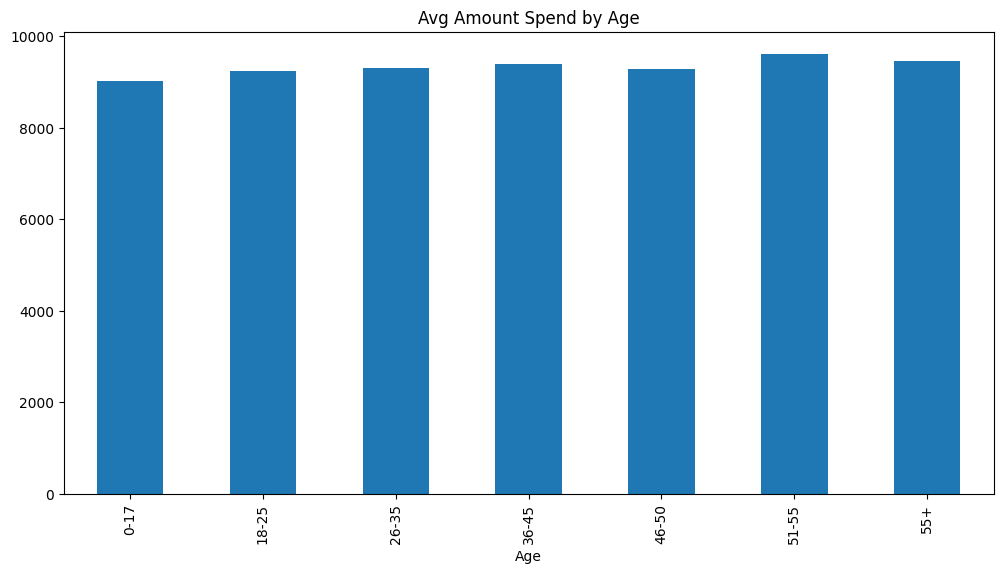

In [18]:
df.groupby('Age').mean(numeric_only=True)['Purchase'].plot.bar(figsize = (12,6), title = 'Avg Amount Spend by Age')

<Axes: >

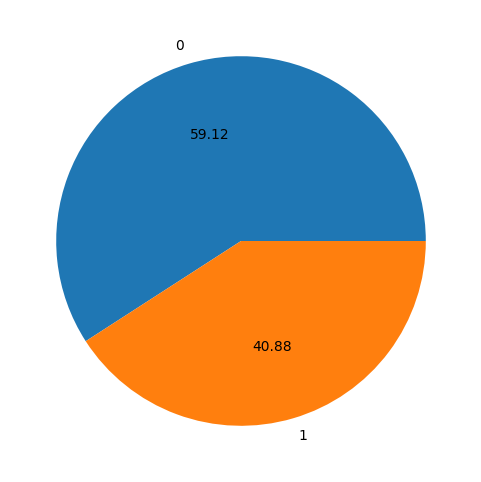

In [19]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = "%.2f", figsize = (6,6))

<Axes: >

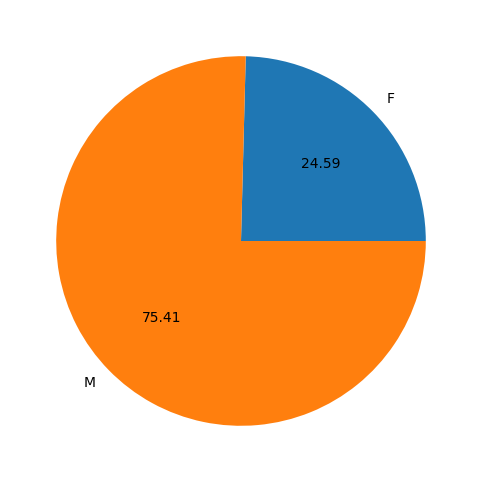

In [20]:
df.groupby('Gender').size().plot(kind = 'pie', autopct = "%.2f", figsize = (6,6))

# Multi Column Analysis
So all this time we were just talking about single column analysis but now let's get started with multi column analysis. We will use the Seaborn library to visualise them and present them in a more beautiful manner. We have done analysis with the help of Age and Gender columns and presented them with the help of the Seaborn library. We have also added legends which is basically the hue parameter within the seaborn function. So we can basically do analysis for any number of columns based on our choice with the help of the seaborn library. 

<Axes: xlabel='Age', ylabel='count'>

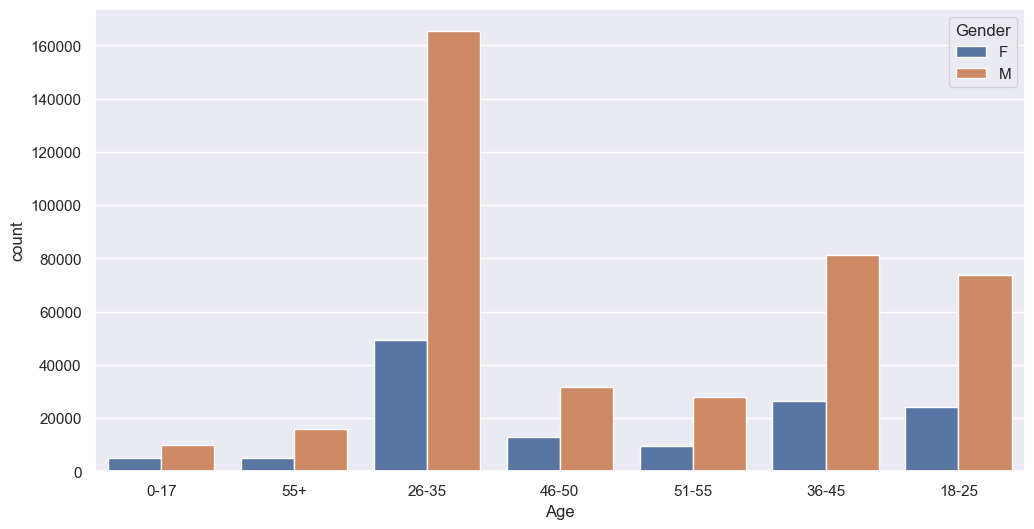

In [21]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = 'Age', hue = 'Gender', data = df)

<Axes: xlabel='Gender', ylabel='count'>

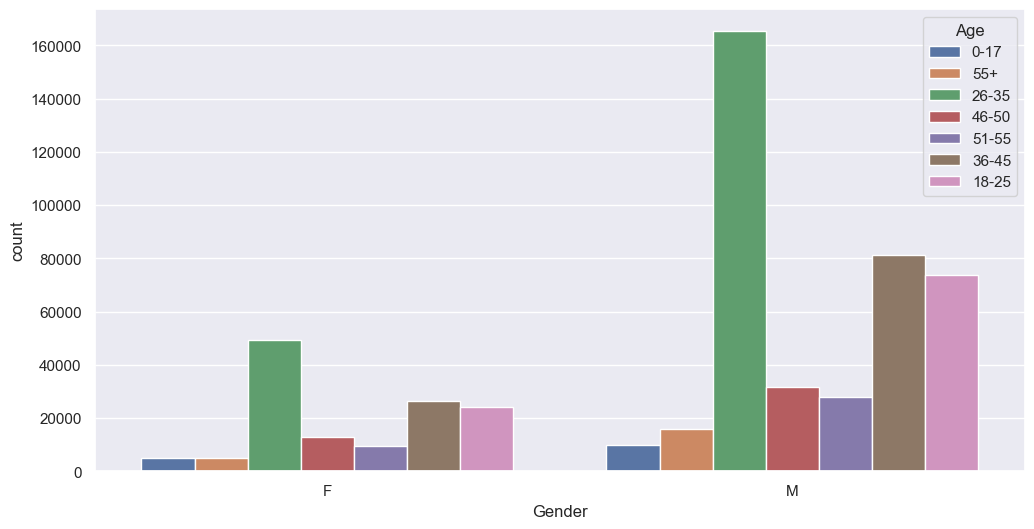

In [22]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = 'Gender', hue = 'Age', data = df)

<Axes: xlabel='Gender', ylabel='count'>

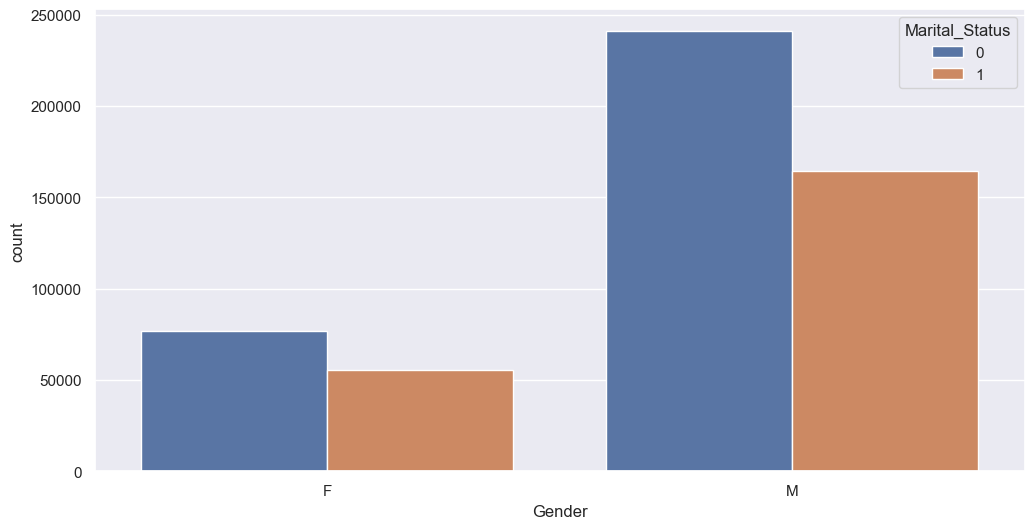

In [23]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = 'Gender', hue = 'Marital_Status', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

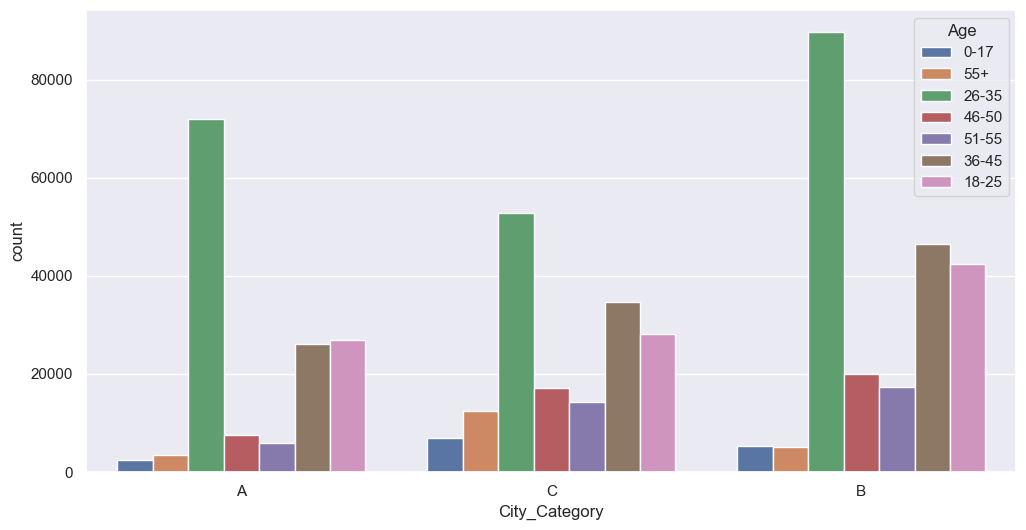

In [24]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = 'City_Category', hue = 'Age', data = df)

<Axes: xlabel='City_Category', ylabel='count'>

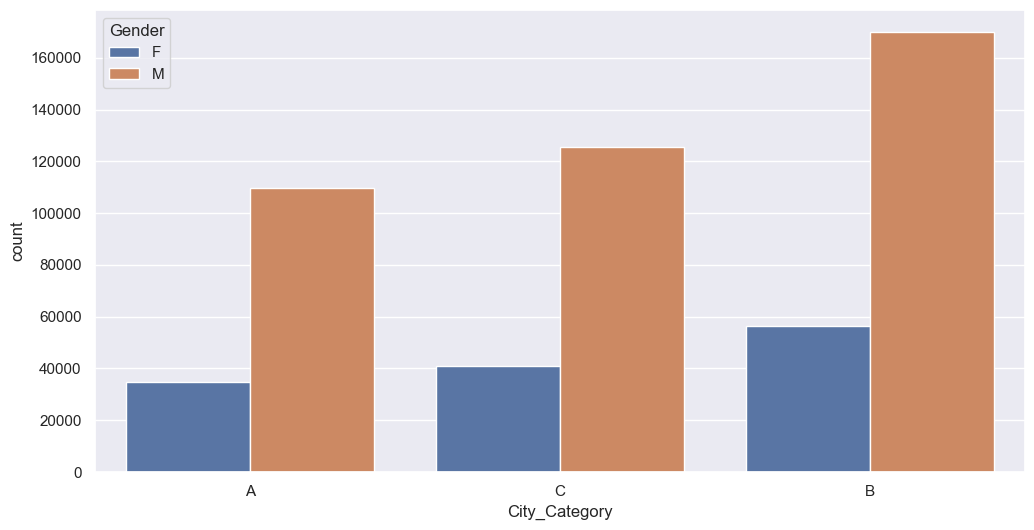

In [25]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = 'City_Category', hue = 'Gender', data = df)

<Axes: ylabel='Purchase'>

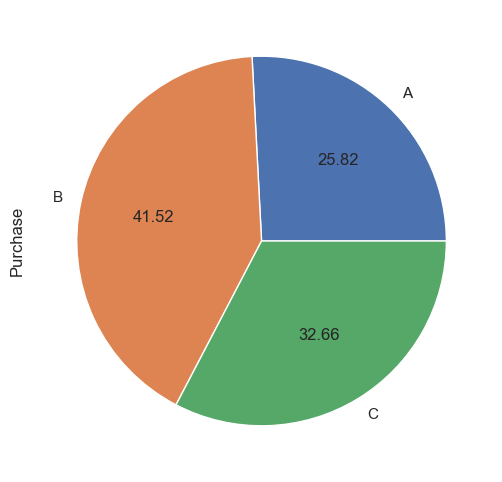

In [26]:
df.groupby('City_Category').sum()['Purchase'].plot(kind = 'pie', autopct = '%0.2f')

<Axes: ylabel='Purchase'>

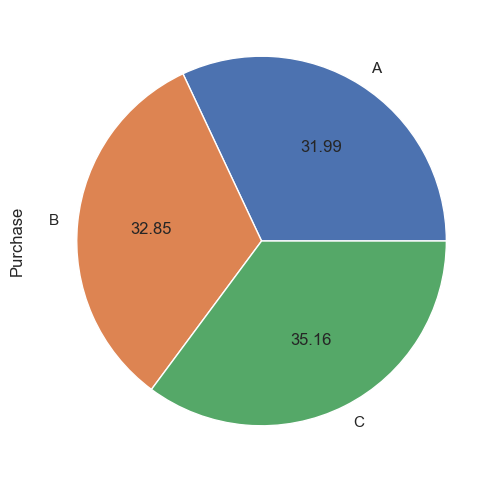

In [27]:
df.groupby('City_Category').mean(numeric_only=True)['Purchase'].plot(kind = 'pie', autopct = '%0.2f')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

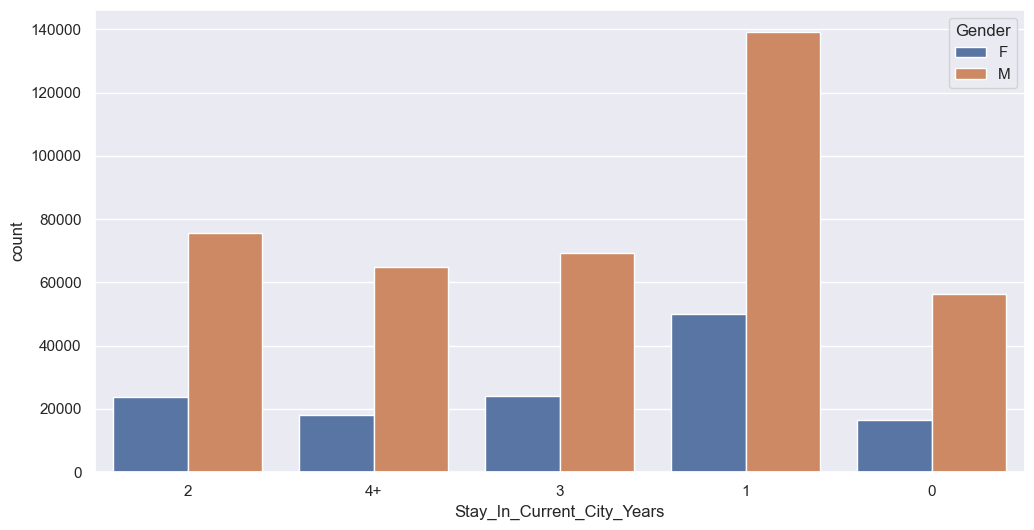

In [31]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue='Gender', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

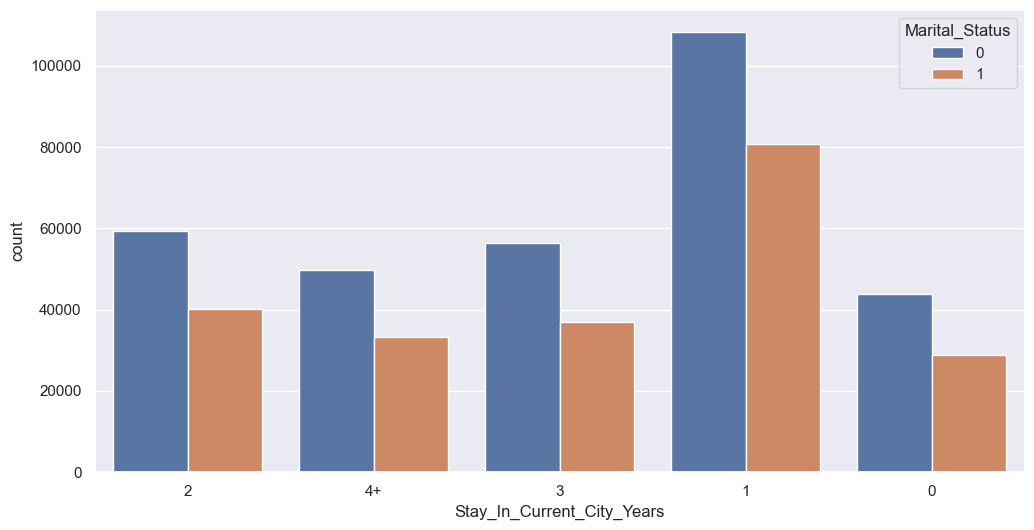

In [32]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue='Marital_Status', data = df)

<Axes: xlabel='Stay_In_Current_City_Years'>

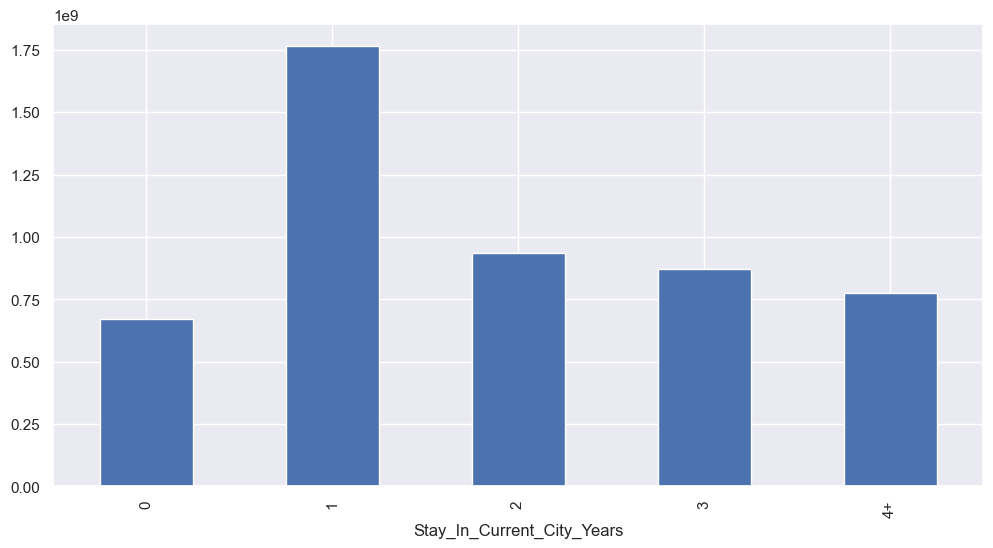

In [35]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'bar')

<Axes: xlabel='Stay_In_Current_City_Years'>

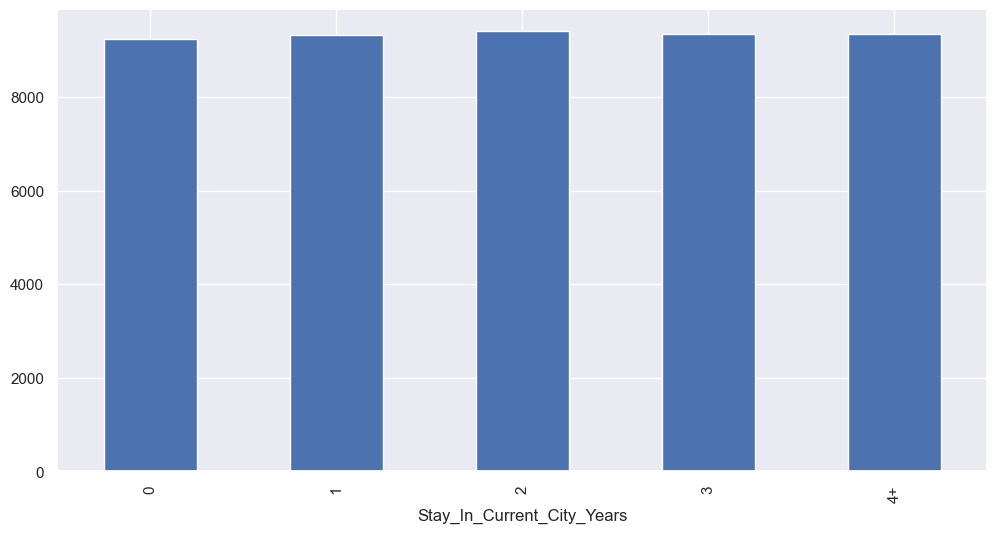

In [36]:
df.groupby('Stay_In_Current_City_Years').mean(numeric_only=True)['Purchase'].plot(kind = 'bar')

# Occupation and Products Analysis

We are going to perform the same data visualizations which we did till now for the Occupation ,Product_ID and Product_Category_1 columns. Using the countplot we can get various insights about which kind of data is present the most in our dataset. We have also plotted normal bar plots with the help of groupby function to get information such as which Product_ID has got the maximum purchasing amount in our dataset.

<Axes: xlabel='Occupation'>

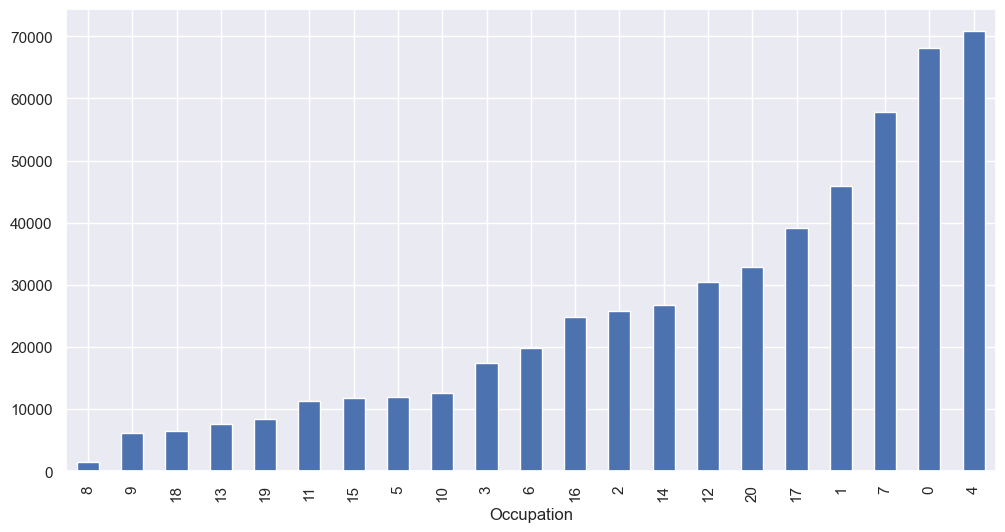

In [ ]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation'>

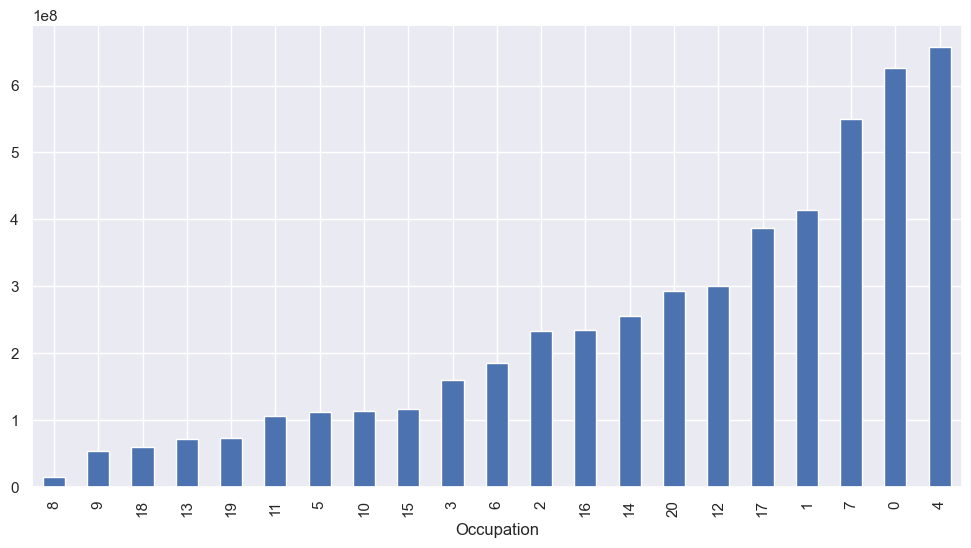

In [39]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

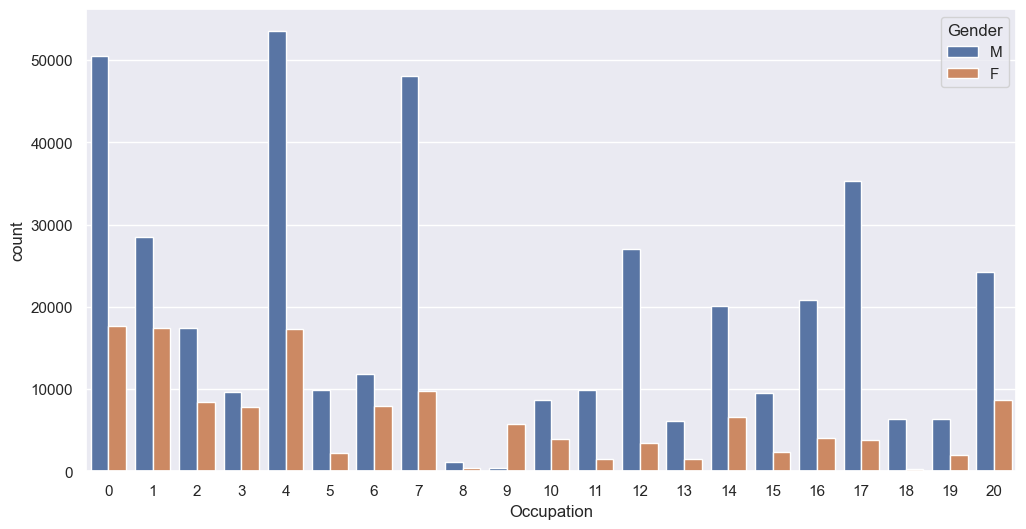

In [40]:
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)

<Axes: xlabel='Occupation'>

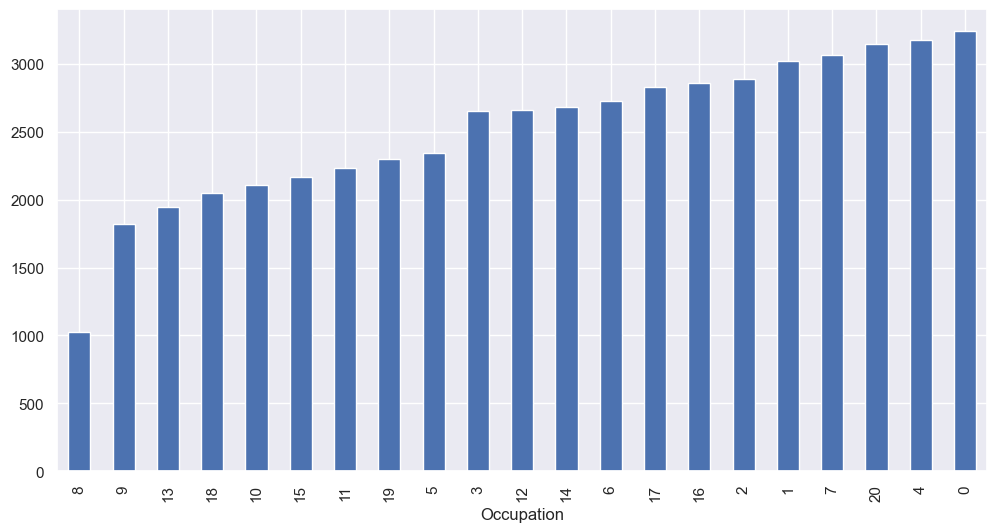

In [43]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1'>

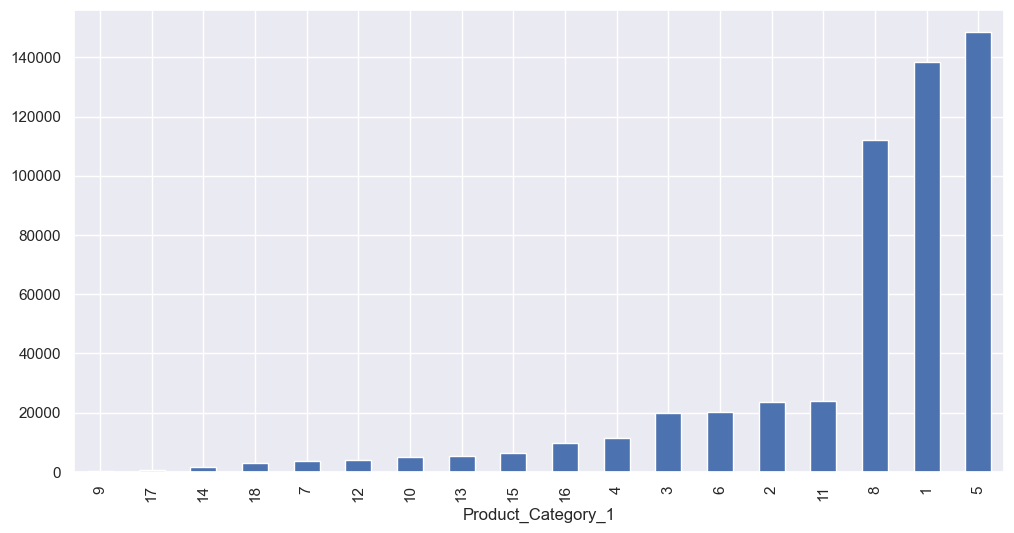

In [49]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

Approximate Price of Each Product in Product Category

<Axes: xlabel='Product_Category_1'>

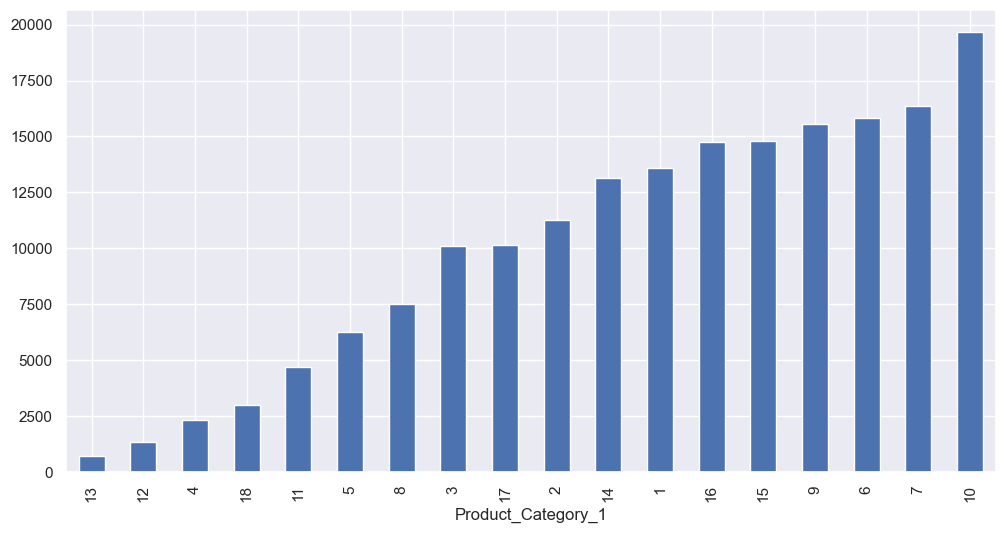

In [51]:
df.groupby('Product_Category_1').mean(numeric_only=True)['Purchase'].sort_values().plot(kind = 'bar')

Most Bought Product ID's

<Axes: xlabel='Product_ID'>

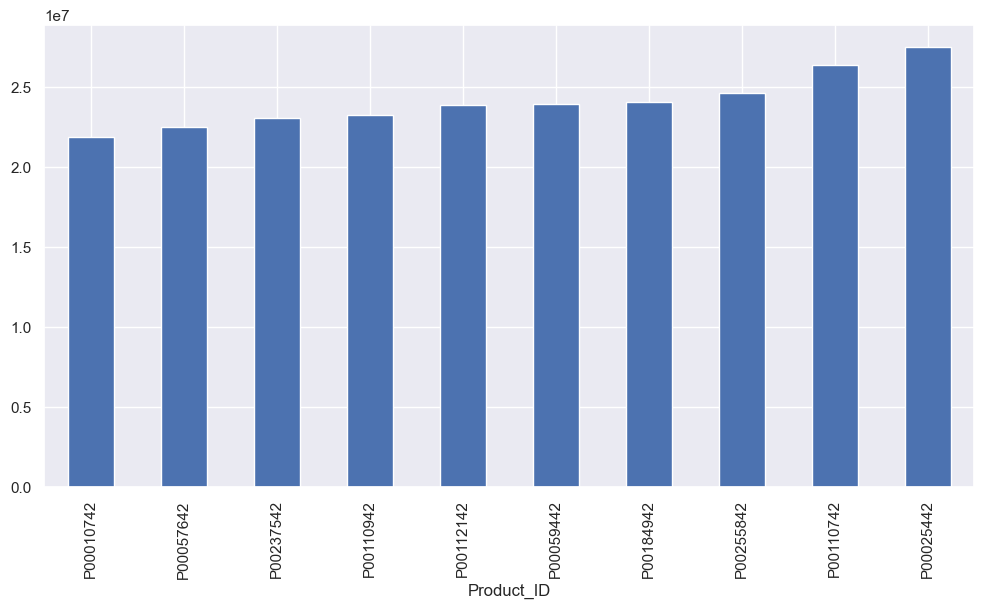

In [52]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

Most Expensive Product ID's

<Axes: xlabel='Product_ID'>

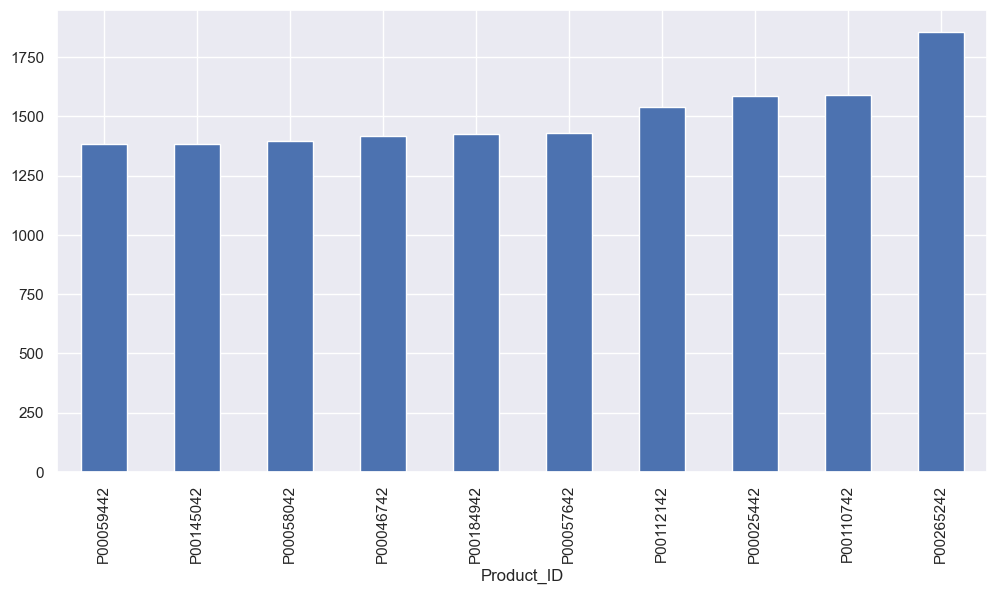

In [53]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

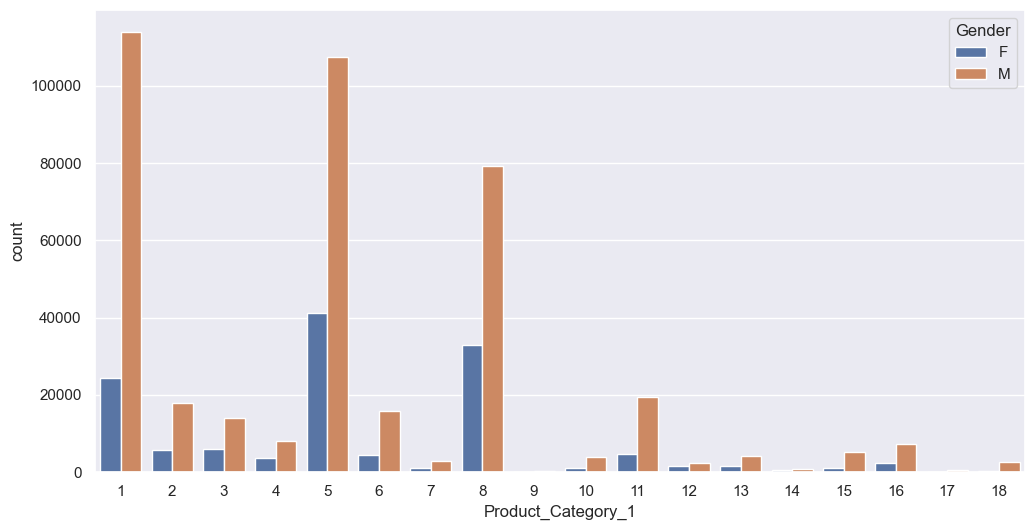

In [54]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

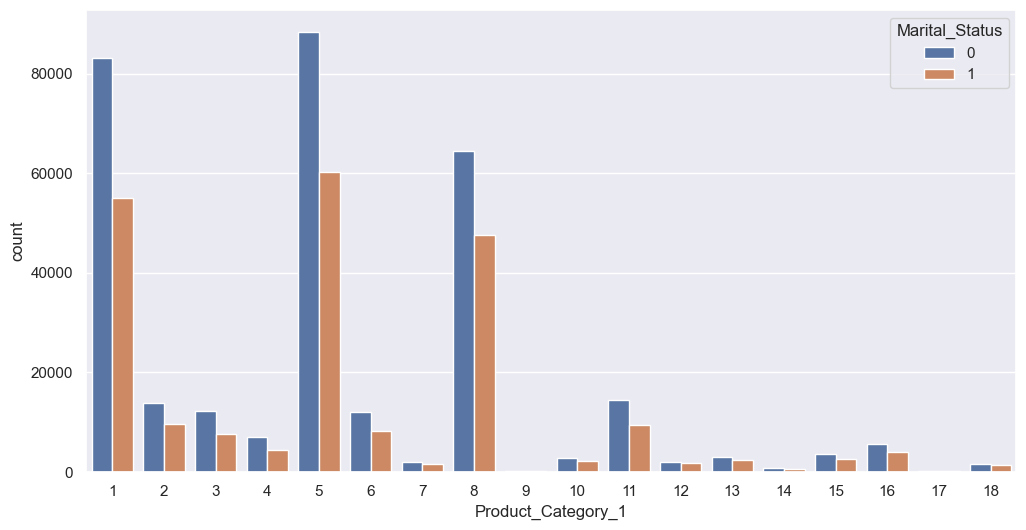

In [55]:
sns.countplot(x = 'Product_Category_1', hue = 'Marital_Status', data = df)

# Combining Gender & Marital Status
So this the last subtopic in this project and here we have combined the Gender and Martial Status. Hence using seaborn we are able to perform various kinds of data visualizations and get meaningful insights of our data when Gender and Martial Status is combined with the help of mainly the countplot.

In [67]:
l = []
for i in range(len(df)):
    l.append(df['Gender'][i] + "_" + str(df['Marital_Status'][i]))
df['MaritalGender'] = l

In [68]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

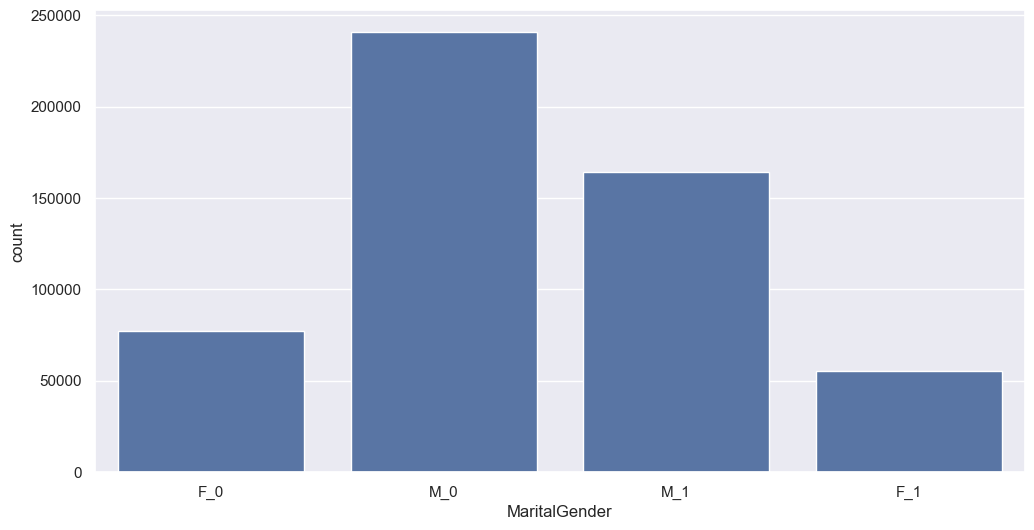

In [69]:
sns.countplot(x = df['MaritalGender'])

<Axes: xlabel='MaritalGender', ylabel='count'>

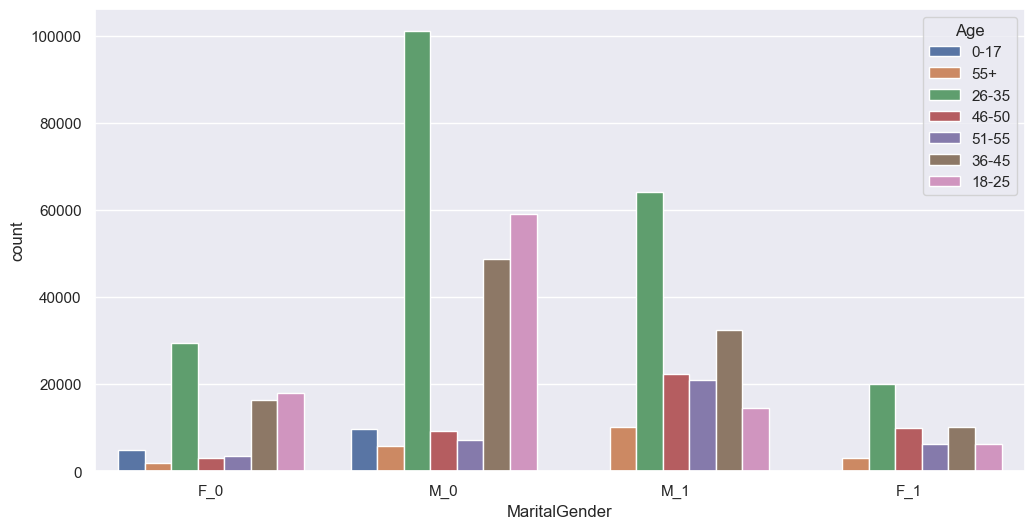

In [70]:
sns.countplot(x = 'MaritalGender', hue = 'Age', data = df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

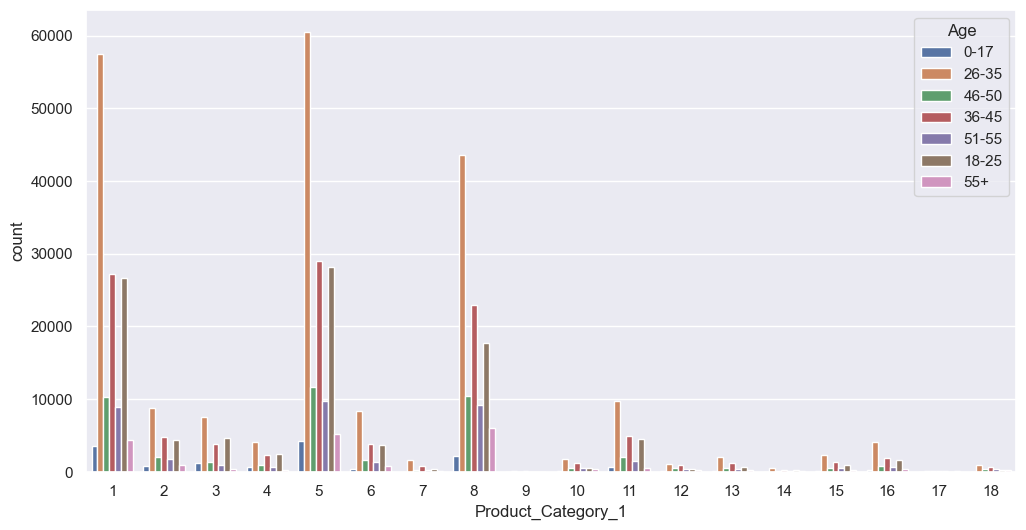

In [71]:
sns.countplot(x = 'Product_Category_1', hue = 'Age', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

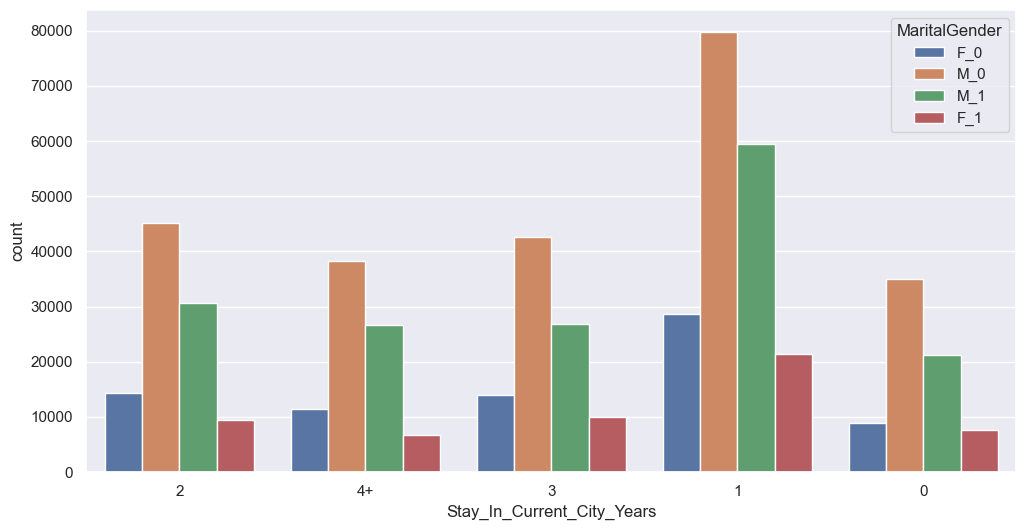

In [72]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'MaritalGender', data = df)